In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import sys
from HighLevelFeatures import HighLevelFeatures as HLF
import numpy as np
import h5py
import matplotlib.pyplot as plt
from model import WGANGP
from train import *
from common import *
from evaluate import *

In [57]:
input_path = '../input/dataset1'
train_path = '../output/dataset1/v2/BNswish_hpo4-M1'
particle = 'photons'
model_i = get_best_mode_i(train_path, particle)
categories, E_gan_list = get_E_gan(733, input_file=f'{input_path}/dataset_1_photons_1.hdf5', train_path=train_path, eta_slice='20_25', mode='layer')

In [29]:
input_path = '../input/dataset1'
categories1, E_vox_list = get_E_truth(f'{input_path}/dataset_1_photons_1.hdf5', mode='layer')


In [223]:
categories1, E_vox_list

(array([    256,     512,    1024,    2048,    4096,    8192,   16384,
          32768,   65536,  131072,  262144,  524288, 1048576, 2097152,
        4194304]),
 {0: [array([[174.94487],
          [  0.     ],
          [  0.     ],
          ...,
          [  0.     ],
          [114.22928],
          [  5.07303]]),
   array([[ 87.59759 ],
          [157.47286 ],
          [ 47.454385],
          ...,
          [  0.625918],
          [  0.      ],
          [132.997339]]),
   array([[ 76.825278],
          [246.2841  ],
          [465.62968 ],
          ...,
          [257.1947  ],
          [  0.      ],
          [109.7305  ]]),
   array([[ 82.040521 ],
          [103.69343  ],
          [108.87837  ],
          ...,
          [  0.       ],
          [  0.138406 ],
          [114.7944473]]),
   array([[101.718488 ],
          [191.696015 ],
          [  1.66443  ],
          ...,
          [155.111438 ],
          [343.2926253],
          [107.60077  ]]),
   array([[  1.21156 ],
 

In [232]:
photon_file = h5py.File(f'{input_path}/dataset_1_photons_1.hdf5', 'r')
energies1 = photon_file['incident_energies'][:]
pion_file = h5py.File(f'{input_path}/dataset_1_pions_1.hdf5', 'r')
energies2 = pion_file['incident_energies'][:]


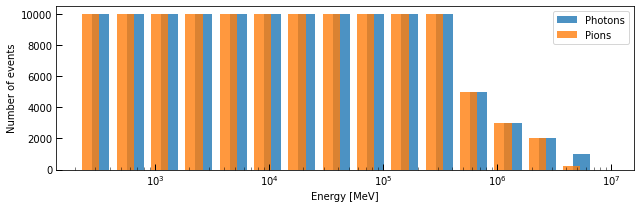

In [285]:
bins = np.logspace(8,23,31, base=2)
fig, ax = plt.subplots(figsize=(9, 3))
plt.hist(energies1*1.1, bins=bins*1.1, alpha=0.8, label='Photons')
plt.hist(energies2*0.9, bins=bins*0.9, alpha=0.8, label='Pions')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Number of events')
plt.tick_params(axis="both", which="major", width=1, length=6, labelsize=10, direction="in")
plt.tick_params(axis="both", which="minor", width=0.5, length=3, labelsize=10, direction="in")
plt.legend()
plt.tight_layout()
plt.savefig('statistics.pdf')
plt.show()

In [270]:
categories1

array([    256,     512,    1024,    2048,    4096,    8192,   16384,
         32768,   65536,  131072,  262144,  524288, 1048576, 2097152,
       4194304])

In [236]:
np.unique(energies2, return_counts=True)

(array([    256.,     512.,    1024.,    2048.,    4096.,    8192.,
          16384.,   32768.,   65536.,  131072.,  262144.,  524288.,
        1048576., 2097152., 4194304.]),
 array([10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
        10000, 10000,  5000,  3000,  2000,   230]))

In [237]:
np.unique(energies1, return_counts=True)

(array([    256.,     512.,    1024.,    2048.,    4096.,    8192.,
          16384.,   32768.,   65536.,  131072.,  262144.,  524288.,
        1048576., 2097152., 4194304.]),
 array([10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
        10000, 10000,  5000,  3000,  2000,  1000]))

Create a condition label using the kinetic energy. The relativistic relation between kinetic energy and momentum is given by [ref](https://en.wikipedia.org/wiki/Kinetic_energy)

$$E_k = \sqrt{p^2 + m^2} - m$$

Label is normalised by LogE, ie

$$Lable (E_k) = \frac{log\frac{E_k}{E_{k, min}}}{log\frac{E_{k, max}}{E_{k, min}}} $$

In [4]:
mass = particle_mass(hlf.particle)
kin = np.sqrt( np.square(photon_file['incident_energies'][:]) + np.square(mass) ) - mass
label_kin = kin_to_label(kin)

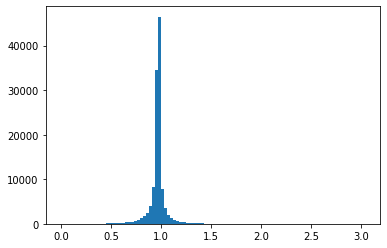

In [5]:
X_train = photon_file['showers'][:] / kin
_ = plt.hist(X_train.sum(axis=1), bins=100)

In [6]:
X_train.shape

(121000, 368)

(array([3.1000e+01, 9.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        1.0000e+01, 1.0000e+01, 1.7000e+01, 2.9000e+01, 1.8000e+01,
        3.4000e+01, 2.6000e+01, 4.2000e+01, 5.8000e+01, 6.0000e+01,
        7.5000e+01, 9.7000e+01, 1.0200e+02, 1.5200e+02, 1.9000e+02,
        2.8000e+02, 2.9900e+02, 4.3500e+02, 4.8500e+02, 6.5200e+02,
        9.2900e+02, 1.1910e+03, 1.7380e+03, 2.4820e+03, 4.0490e+03,
        8.2410e+03, 3.4531e+04, 4.6479e+04, 7.8250e+03, 3.5370e+03,
        2.0860e+03, 1.3590e+03, 9.3300e+02, 6.4600e+02, 4.6900e+02,
        3.6700e+02, 2.7200e+02, 1.6900e+02, 1.1300e+02, 9.2000e+01,
        8.4000e+01, 6.8000e+01, 4.2000e+01, 2.5000e+01, 2.9000e+01,
        2.1000e+01, 2.3000e+01, 1.1000e+01, 1.0000e+01, 1.0000e+01,
        8.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

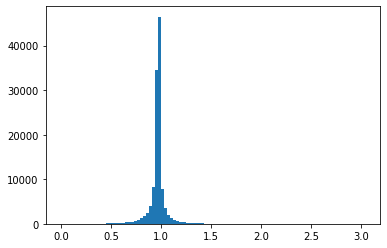

In [7]:
ratio = photon_file['showers'][:].sum(axis=1).reshape(-1,1) / photon_file['incident_energies'][:]
plt.hist(ratio, bins=100)

In [8]:
# HLF_1_photons.CalculateFeatures(photon_file["showers"][:])
# print("Total energy of each photon shower: ", HLF_1_photons.GetEtot())

# # energy deposited in each layer of the geometry:
# # (returns a dict with layer_number as key. Note that the ATLAS geometry has fewer relevant layer than are totally
# # available, the 5th layer of the photons therefore has layer_number 12)
# print("Energy deposited in each layer for each photon shower: ", HLF_1_photons.GetElayers())
# # print("Average energy deposited in the first layer for pion showers: ", HLF_1_pions.GetElayers()[0].mean())
# # print("Average energy deposited in the last layer for pion showers: ", HLF_1_pions.GetElayers()[14].mean())


# # # Center of energy in eta direction:
# # # (only available for layer with more than one alpha bin)
# # print("Center of energy in eta direction for each photon shower: ", HLF_1_photons.GetECEtas())
# # # and its width
# # print("Width of center of energy in eta direction for each photon shower: ", HLF_1_photons.GetWidthEtas())

# # # Center of energy in phi direction:
# # # (only available for layer with more than one alpha bin)
# # print("Center of energy in phi direction for each pion shower: ", HLF_1_pions.GetECPhis())
# # # and its width
# # print("Width of center of energy in phi direction for each pion shower: ", HLF_1_pions.GetWidthEtas())
